## Import dependencies

In [0]:
# Importing tensorflow version
try:
  %tensorflow_version 2.x
except Exceptions:
  pass
import tensorflow as tf

In [0]:
# Importing dependencies 
import numpy as np
import logging
logger =tf.get_logger()
logger.setLevel(logging.ERROR)

## Setting up Training Data

In [0]:
# Setting Up training data 
celsius = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit =np.array([-40,14,32,46,59,72,100], dtype=float)
for i,c in enumerate(celsius):
  print("{} degrees celsius = {} degrees Fahrenheit". format(c,fahrenheit[i]))
  

-40.0 degrees celsius = -40.0 degrees Fahrenheit
-10.0 degrees celsius = 14.0 degrees Fahrenheit
0.0 degrees celsius = 32.0 degrees Fahrenheit
8.0 degrees celsius = 46.0 degrees Fahrenheit
15.0 degrees celsius = 59.0 degrees Fahrenheit
22.0 degrees celsius = 72.0 degrees Fahrenheit
38.0 degrees celsius = 100.0 degrees Fahrenheit


## Some Machine Learning terminology
- **Feature** — The input(s) to our model. In this case, a single value — the degrees in **Celsius**.

- **Labels** — The output our model predicts. In this case, a single value — the degrees in **Fahrenheit**.

- **Example** — A pair of inputs/outputs used during training. In our case a pair of values from celsius and fahrenheit at a specific index, such as (15,59).

## Create a Model
Since the problem is straight forward we will use simplest possible model, dense network - single layered with only single neuron. 

In [0]:
# input_shape=[1] - shape is 1D with one member. 
# units to specify number of neurons in the layer.
# In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer
l0= tf.keras.layers.Dense(units=1,input_shape=[1])

### Assemble layers into model 

In [0]:
# Sequential layers takes the list of layers as arguments specifying the order of calculation from input to output.
model = tf.keras.Sequential(l0)

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=1, input_shape=[1])
])

## Compile the model with loss and optimzation
- Before training the model has to be compiled.
- For compiling the model is given the -
    - **Loss function** : A way of mesuring how far is the prediction from the desired output (The measured differnces is called the loss)
    - **Optimizer function** : A way of adjusting internal values in order to minimise/reduce the loss.

In [0]:
# mean_squared_error and Adam are standard for the simple model
# 0.1 = learning rate, if too low it takes many iterations if too high accuracy goes down ranges between (0.001 to 0.1).
model.compile(loss='mean_squared_error', 
              optimizer= tf.keras.optimizers.Adam(0.1))

## Train the model
Use fit function to train the model.
> During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

> This cycle of calculate, compare, adjust is controlled by the fit method. 
- The **first argument** is the inputs. 
- The **second argument** is the desired outputs. 
- The **epochs** argument specifies how many times this cycle should be run.
- The **verbose** argument controls how much output the method produces.

In [0]:
model_train =model.fit(celsius,fahrenheit,epochs=500, verbose=False)
print("Finished Training")

Finished Training


## Displaying the Training Statistics 
- **fit** method returns a history object
- We can use Matplotlib to visualize the history object and to see how the loss of this object goes down with number of epochs.



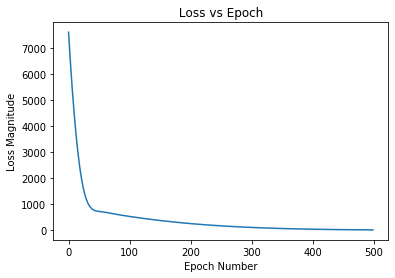

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.title(" Loss vs Epoch ")
plt.plot(model_train.history['loss'])

## Using the model to predict values 


In [0]:
print(model.predict([100.0]))

[[211.28056]]


In [0]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.4150866]], dtype=float32), array([0.], dtype=float32)]


## Experimenting with the Dense Network

In [0]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius, fahrenheit, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74747]]
Model predicts that 100 degrees Celsius is: [[211.74747]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.7953442 , -0.2833251 ,  0.2630216 , -0.12296216]],
      dtype=float32), array([ 3.4322412 ,  0.50864846, -1.4503504 ,  2.9740028 ], dtype=float32)]
These are the l1 variables: [array([[ 0.8413565 ,  1.1296922 , -0.00520743, -0.87533617],
       [-0.22408196, -0.25643662, -0.21093169, -0.60769427],
       [-0.15269352, -0.09645667,  0.60207933,  0.369201  ],
       [ 0.9910636 ,  0.24368672, -0.27782348, -0.7259432 ]],
      dtype=float32), array([ 3.2698886,  2.976815 , -1.9197606, -3.2678993], dtype=float32)]
These are the l2 variables: [array([[ 1.0799022 ],
       [ 0.824599  ],
       [-0.08341711],
       [-1.3245872 ]], dtype=float32), array([3.1475773], dtype=float32)]
